In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt#visualization
import seaborn as sns#visualization
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn import svm

In [2]:
telecom_cust = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')

In [3]:
#Removing missing values 
telecom_cust.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = telecom_cust.drop(columns=['customerID'])
#telecom_cust.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

In [4]:
# Split trianing and test Data:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Logistic Regression

In [5]:
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


logit.fit(X_train,y_train)
predict = logit.predict(X_test)
Proba  = logit.predict_proba(X_test)

print("Algorithm :",  logit)
print ("\n Classification report : \n",classification_report(y_test,predict))
print ("Accuracy   Score : ",accuracy_score(y_test,predict))
model_roc_auc = roc_auc_score(y_test,predict) 
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test,Proba[:,1])

Algorithm : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1294
           1       0.65      0.54      0.59       464

   micro avg       0.80      0.80      0.80      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.79      0.80      0.80      1758

Accuracy   Score :  0.8020477815699659
Area under curve :  0.7183103048553003 



AxesSubplot(0.125,0.125;0.775x0.755)


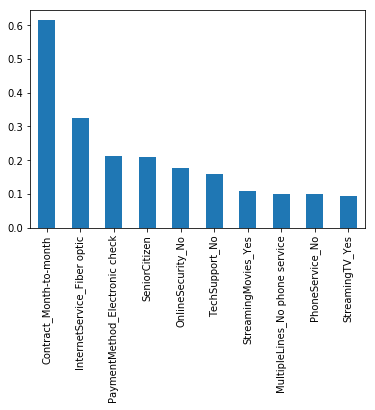

In [6]:
weights = pd.Series(logit.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

# Random Forest Classifier

In [7]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Algorithm :",  clf)
print ("\n Classification report : \n",classification_report(y_test,y_pred))
print ("Accuracy   Score : ",accuracy_score(y_test,y_pred))
model_roc_auc = roc_auc_score(y_test,y_pred) 
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test,Proba[:,1])
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Algorithm : RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.90      0.85      1294
           1       0.60      0.44      0.51       464

   micro avg       0.78      0.78      0.78      1758
   macro avg       0.71      0.67      0.68      1758
weighted avg       0.76      0.78      0.76      1758

Accuracy   Score :  0.7758816837315131
Area under curve :  0.6673589644513137 

Accuracy: 0.7758816837315131


# Gradient Boosting Regressor

In [8]:

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test) 

mse = mean_squared_error(y_test,y_pred)
print("MSE: %.4f" % mse)

MSE: 0.1323


Text(0, 0.5, 'Deviance')

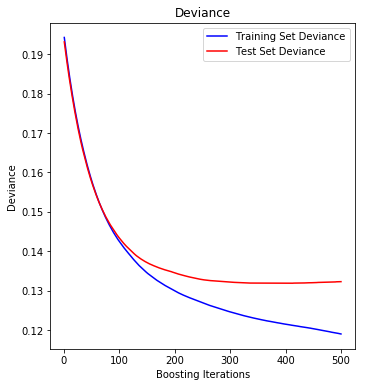

In [9]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# Support Vector Machine (SVM)

In [ ]:
#X_train, X_test, y_train, y_test
#from sklearn.svm import SVC
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(X_train,y_train)
predict = model.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, predict)
print("Algorithm :",  model)
print("accuracy score", accuracy_score)




# XG Boost

In [11]:
import sys
!{sys.executable} -m pip install xgboost

from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_train,y_train)
predict = clf.predict(X_test)

accuracy_score = metrics.accuracy_score(y_test, predict)
print("Algorithm :",  model)
print("accuracy score", accuracy_score)

  Using cached https://files.pythonhosted.org/packages/2e/bd/ad3a963b630fa3ee72d1a672fd207263fa0a18113688273afe8298293535/xgboost-0.82.tar.gz
    Complete output from command python setup.py egg_info:
    ++ pwd
    + oldpath=/private/var/folders/cg/gcv117l90l927w_n_5pyf8th0000gn/T/pip-install-83o087kg/xgboost
    + cd ./xgboost/
    + echo darwin17
    + grep -q darwin
    + LIB_XGBOOST=libxgboost.dylib
    + which g++-5
    + which g++-7
    + which g++-8
    + which clang++
    /anaconda3/bin/clang++
    + export CC=clang
    + CC=clang
    + export CXX=clang++
    + CXX=clang++
    + make clean
    Makefile:31: MAKE [make] - checked OK
    rm -f -rf build build_plugin lib bin *~ */*~ */*/*~ */*/*/*~ */*.o */*/*.o */*/*/*.o #xgboost
    rm -f -rf build_tests *.gcov tests/cpp/xgboost_test
    if [ -d "R-package/src" ]; then \
    	cd R-package/src; \
    	rm -f -rf rabit src include dmlc-core amalgamation *.so *.dll; \
    	cd /private/var/folders/cg/gcv117l90l927w_n_5pyf8th0000gn/T/

Command "python setup.py egg_info" failed with error code 1 in /private/var/folders/cg/gcv117l90l927w_n_5pyf8th0000gn/T/pip-install-83o087kg/xgboost/


ModuleNotFoundError: No module named 'xgboost'

# Catboost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
!pip3 install xgboost